
# Analyse des facteurs clés qui influencent le niveau d’étude des personnes en situation de déficience visuelle.

## Table des matières
<ol>
<li><a href="#desc">Description du projet</a></li>
<li><a href="#collecte">Collecte de données</a></li>
<li><a href="#preparation">Préparation des données</a></li>
<li><a href="#analyse">Analyse de données</a></li>
<li><a href="#visualisation">Visualisation de données</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ol>

<a id='desc'></a>
# Description du projet
> Le projet soumis à notre appreciation à pour but de determiner les facteurs clés qui influencent le niveau d'étude des personnes en situation de déficience visuelle.

> Notre étude porte sur une population constituée de personnes malvoyantes dans plusieurs districts à istanbul.

>Le dataset est disponible et téléchargeable sur Kaggle via l'URL suivant: https://www.kaggle.com/datasets/turhancankargin/visually-impaired-citizens-in-istanbul  
>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='collecte'></a>
# Collecte de données

In [110]:
url = r"C:\Users\thier\Downloads\education-visually-disabled.csv"

In [111]:
df = pd.read_csv(url)

In [112]:
df.head(5)

,District,Gender,Education Level,Number of Visually Impaired Citizens
0,ADALAR,Male,Bachelor's Degree,2
1,ADALAR,Male,Middle School,1
2,ADALAR,Male,Special Education,2
3,ADALAR,Male,Primary School,4
4,ADALAR,Male,Primary/Middle School,1


### Description du dataset:
>District : Qui represente le nom d'un district géographique.

>Gender : Il s'agit d'une variable catégorielle qui indique le sexe des individus dans l'ensemble de données.

>Education Level : Il s'agit d'une autre variable catégorielle qui représente le niveau d'éducation le plus élevé que les  individus ont atteint.

>Number of Visually Impaired Citizens : il s'agit d'une variable numérique qui représente le nombre de citoyens malvoyants ayant le niveau d'éducation donné dans un district spécifique.

<a id='preparation'></a>
# Préparation de données

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 4 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   District                              748 non-null    object
 1   Gender                                748 non-null    object
 2   Education Level                       748 non-null    object
 3   Number of Visually Impaired Citizens  748 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 23.5+ KB


In [114]:
df.rename(columns={'Number of Visually Impaired Citizens':'Number'}, inplace=True)

In [120]:
valeur_manquante = df.isnull().sum()
valeur_manquante.to_frame()

,0
District,0
Gender,0
Education Level,0
Number,0


In [119]:
doublon = df.duplicated().sum()
doublon

0

<a id='analyse'></a>
# Analyse de données

### statistique descriptive

> Ceci fourni un résumé global de l'ensemble de données (nombre, moyenne, min, max, etc., pour les variables numériques ; nombre, unique, top, fréquence, etc., pour les variables catégorielles).

> Cette étape nous permettra de mieux comprendre la structure et les propriétés du dataset.


In [121]:
df_description = df.describe(include='all')
df_description

,District,Gender,Education Level,Number
count,748,748,748,748.000000
unique,40,2,11,NaN
top,ESENYURT,Male,Primary School,NaN
freq,22,384,80,NaN
mean,NaN,NaN,NaN,21.359626
std,NaN,NaN,NaN,30.350656
min,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,4.000000
50%,NaN,NaN,NaN,11.000000
75%,NaN,NaN,NaN,25.000000


#### Les statistiques descriptives de l'ensemble de données sont les suivantes :

> District : Il y a 40 districts uniques dans l'ensemble de données, et le district apparaissant le plus fréquemment est Esenyurt.

> Gender : il existe deux genres uniques dans l'ensemble de données, le mâle apparaissant le plus fréquemment.

>Niveau d'éducation : il existe 11 niveaux d'éducation uniques dans l'ensemble de données, et le niveau d'éducation qui apparaît le plus fréquemment est « École primaire ».

>Number: le nombre moyen de citoyens malvoyants (par district, sexe et niveau d'éducation) est d'environ 21. Le nombre minimum est de 1, la médiane est de 11 et le nombre maximum est de 284. Les quartiles suggèrent que la plupart des comptes sont compris entre 4 et 25, mais il existe également un nombre important de comptes plus élevés, comme l'indiquent l'écart type et la valeur maximale élevés.

### L'analyse doit permettre entre autre de:

> Comparer la répartition du niveau d'éducation des citoyens malvoyants dans différents districts.

> Fournir une répartition par sexe du niveau d’éducation des citoyens malvoyants.

> Identifiez les districts comptant le plus grand nombre de citoyens malvoyants.

> Examiner la relation entre le niveau d'éducation et le nombre de citoyens malvoyants.

> Comprendre le ratio hommes-femmes parmi les citoyens malvoyants à différents niveaux d'éducation.

> Identifiez le niveau d’éducation le plus courant parmi les citoyens malvoyants.

> Comprendre la répartition des citoyens malvoyants entre les différents niveaux d'éducation au sein de chaque district.

> Analysez l’ensemble de données pour un ou plusieurs sexes spécifiques.

> Comprendre la répartition globale des niveaux d'éducation parmi les citoyens malvoyants, sans tenir compte du district et du sexe.
>

In [43]:
df['Number'].sum()

15977

In [33]:
district_education = df.groupby(['District', 'Education Level'])['Number'].sum().unstack()
district_education.head(10)

Education Level,Associate's Degree,Bachelor's Degree,High School,Illiterate,Literate,Master's/PhD Degree,Middle School,Other,Primary School,Primary/Middle School,Special Education
District,,,,,,,,,,,
ADALAR,NaN,2.0,NaN,NaN,NaN,NaN,1.0,1.0,5.0,1.0,2.0
ARNAVUTKÖY,NaN,1.0,12.0,62.0,11.0,NaN,9.0,39.0,87.0,17.0,13.0
ATAŞEHİR,6.0,21.0,36.0,37.0,26.0,1.0,5.0,75.0,69.0,18.0,5.0
AVCILAR,9.0,23.0,106.0,150.0,50.0,NaN,31.0,20.0,174.0,61.0,34.0
BAHÇELİEVLER,9.0,26.0,161.0,282.0,36.0,2.0,15.0,66.0,440.0,120.0,47.0
BAKIRKÖY,5.0,16.0,17.0,11.0,4.0,1.0,13.0,7.0,19.0,11.0,3.0
BAYRAMPAŞA,5.0,12.0,19.0,31.0,11.0,NaN,8.0,80.0,84.0,28.0,9.0
BAĞCILAR,3.0,14.0,78.0,146.0,16.0,1.0,13.0,133.0,202.0,49.0,45.0
BAŞAKŞEHİR,7.0,21.0,40.0,70.0,16.0,1.0,13.0,33.0,79.0,21.0,10.0


> Le tableau ci-dessus montre la répartition des niveaux d'éducation des citoyens malvoyants dans différents districts. Chaque cellule du tableau représente le nombre total de citoyens malvoyants dans un district particulier avec un niveau d'éducation spécifique.

In [125]:
gender_education = df.groupby(['Gender', 'Education Level'])['Number'].sum().unstack()
gender_education

Education Level,Associate's Degree,Bachelor's Degree,High School,Illiterate,Literate,Master's/PhD Degree,Middle School,Other,Primary School,Primary/Middle School,Special Education
Gender,,,,,,,,,,,
Female,65,177,569,1896,373,10,162,904,1394,475,270
Male,100,378,1335,1105,284,15,380,1356,3194,1188,347


> Le tableau ci-dessus montre la répartition des niveaux d'éducation des citoyens malvoyants en fonction du sexe. Chaque cellule du tableau représente le nombre total de citoyens malvoyants d'un sexe spécifique et d'un niveau d'éducation particulier.

In [129]:
total_district = df.groupby(['District'])['Number'].sum()
total_district.sort_values(ascending=False).to_frame()

,Number
District,
BAHÇELİEVLER,1204
GAZİOSMANPAŞA,1021
KÜÇÜKÇEKMECE,940
ESENYURT,870
SULTANBEYLİ,761
BAĞCILAR,700
AVCILAR,658
PENDİK,642
BÜYÜKÇEKMECE,640


> Le tableau ci_dessus montre le total des citoyens malvoyants par district.

In [85]:
total_district.sum()

15977

In [130]:
total_education = df.groupby(['Education Level'])['Number'].sum()
total_education.sort_values(ascending=False).to_frame()

,Number
Education Level,
Primary School,4588
Illiterate,3001
Other,2260
High School,1904
Primary/Middle School,1663
Literate,657
Special Education,617
Bachelor's Degree,555
Middle School,542


> Le tableau ci_dessus montre le total des citoyens malvoyants par niveau d'éducation.

In [94]:
total_gender = df.groupby(['Gender'])['Number'].sum()
total_gender.sort_values(ascending=False).to_frame()

,Number
Gender,
Male,9682
Female,6295


> nombre total de citoyens malvoyants par sexe

In [95]:
gender_ratio = gender_education.div(gender_education.sum(axis=0),axis=1) * 100
gender_ratio

Education Level,Associate's Degree,Bachelor's Degree,High School,Illiterate,Literate,Master's/PhD Degree,Middle School,Other,Primary School,Primary/Middle School,Special Education
Gender,,,,,,,,,,,
Female,39.393939,31.891892,29.884454,63.17894,56.773212,40.0,29.889299,40.0,30.383609,28.562838,43.76013
Male,60.606061,68.108108,70.115546,36.82106,43.226788,60.0,70.110701,60.0,69.616391,71.437162,56.23987


> Le tableau ci-dessus montre le pourcentage hommes-femmes des citoyens malvoyants pour chaque niveau d'éducation.

In [133]:
district_education_ratio = district_education.div(district_education.sum(axis=1), axis=0)*100
district_education_ratio.head(30)

Education Level,Associate's Degree,Bachelor's Degree,High School,Illiterate,Literate,Master's/PhD Degree,Middle School,Other,Primary School,Primary/Middle School,Special Education
District,,,,,,,,,,,
ADALAR,NaN,16.666667,NaN,NaN,NaN,NaN,8.333333,8.333333,41.666667,8.333333,16.666667
ARNAVUTKÖY,NaN,0.398406,4.780876,24.701195,4.382470,NaN,3.585657,15.537849,34.661355,6.772908,5.179283
ATAŞEHİR,2.006689,7.023411,12.040134,12.374582,8.695652,0.334448,1.672241,25.083612,23.076923,6.020067,1.672241
AVCILAR,1.367781,3.495441,16.109422,22.796353,7.598784,NaN,4.711246,3.039514,26.443769,9.270517,5.167173
BAHÇELİEVLER,0.747508,2.159468,13.372093,23.421927,2.990033,0.166113,1.245847,5.481728,36.544850,9.966777,3.903654
BAKIRKÖY,4.672897,14.953271,15.887850,10.280374,3.738318,0.934579,12.149533,6.542056,17.757009,10.280374,2.803738
BAYRAMPAŞA,1.742160,4.181185,6.620209,10.801394,3.832753,NaN,2.787456,27.874564,29.268293,9.756098,3.135889
BAĞCILAR,0.428571,2.000000,11.142857,20.857143,2.285714,0.142857,1.857143,19.000000,28.857143,7.000000,6.428571
BAŞAKŞEHİR,2.250804,6.752412,12.861736,22.508039,5.144695,0.321543,4.180064,10.610932,25.401929,6.752412,3.215434


> Le tableau ci-dessus montre la répartition des niveaux d'éducation des citoyens malvoyants au sein de chaque district. Chaque cellule du tableau représente la proportion de citoyens malvoyants dans un district particulier avec un niveau d'éducation spécifique.

In [96]:
df_male = df[df['Gender'] == 'Male']
total_education_male = df_male.groupby(['Education Level'])['Number'].sum()
total_education_male.sort_values(ascending=False).to_frame()

,Number
Education Level,
Primary School,3194
Other,1356
High School,1335
Primary/Middle School,1188
Illiterate,1105
Middle School,380
Bachelor's Degree,378
Special Education,347
Literate,284


In [97]:
df_female = df[df['Gender']== 'Female']
total_education_female = df_female.groupby(['Education Level'])['Number'].sum()
total_education_female.sort_values(ascending=False).to_frame()

,Number
Education Level,
Illiterate,1896
Primary School,1394
Other,904
High School,569
Primary/Middle School,475
Literate,373
Special Education,270
Bachelor's Degree,177
Middle School,162


In [103]:
pourcentage_education = (total_education/total_education.sum())*100
pourcentage_education.sort_values(ascending=False).to_frame()

,Number
Education Level,
Primary School,28.716280
Illiterate,18.783251
Other,14.145334
High School,11.917131
Primary/Middle School,10.408713
Literate,4.112161
Special Education,3.861801
Bachelor's Degree,3.473744
Middle School,3.392377


In [104]:
pourcentage_male = (total_education_male/total_education_male.sum())*100
pourcentage_male.sort_values(ascending=False).to_frame()

,Number
Education Level,
Primary School,32.989052
Other,14.005371
High School,13.788473
Primary/Middle School,12.270192
Illiterate,11.412931
Middle School,3.924809
Bachelor's Degree,3.904152
Special Education,3.583970
Literate,2.933278


In [105]:
pourcentage_female = (total_education_female/total_education_female.sum())*100
pourcentage_female.sort_values(ascending=False).to_frame()

,Number
Education Level,
Illiterate,30.119142
Primary School,22.144559
Other,14.360604
High School,9.038920
Primary/Middle School,7.545671
Literate,5.925338
Special Education,4.289118
Bachelor's Degree,2.811755
Middle School,2.573471


<a id='visualisation'></a>
# Visualisation de données 

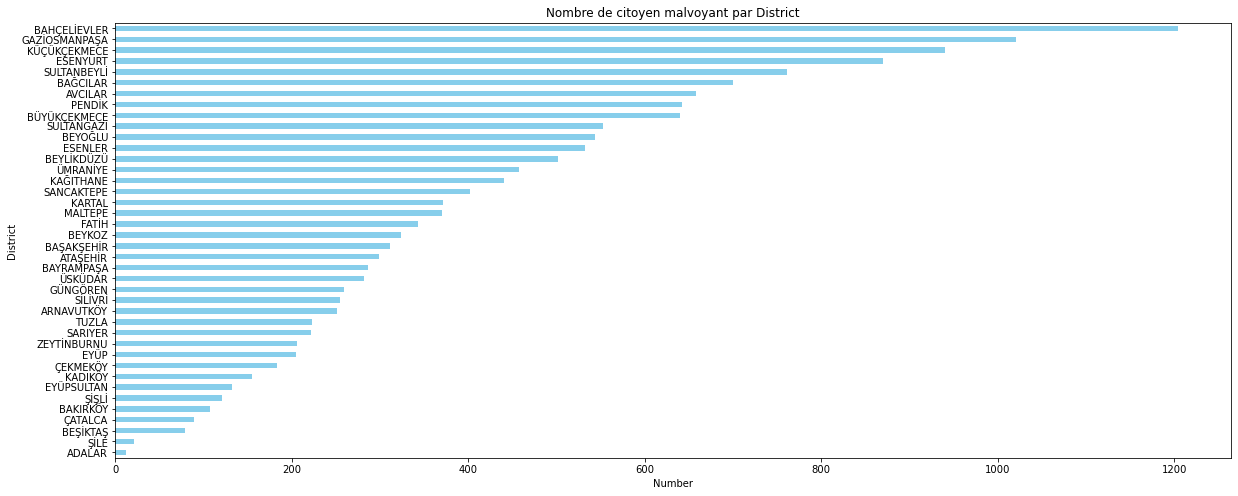

In [53]:
plt.figure(figsize=(20, 8))
total_district.sort_values().plot(kind='barh', color='skyblue')
plt.title('Nombre de citoyen malvoyant par District')
plt.xlabel('Number')
plt.ylabel('District')
plt.show()

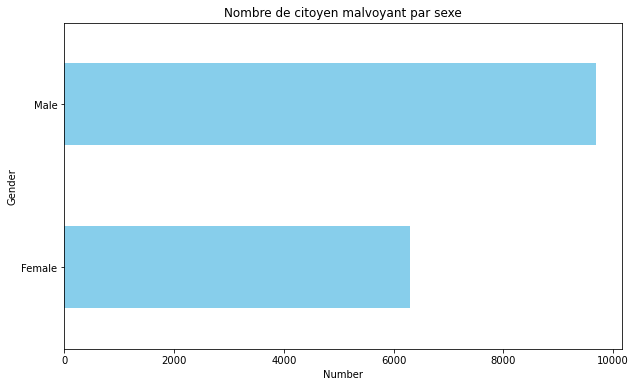

In [56]:
plt.figure(figsize=(10, 6))
total_gender.sort_values().plot(kind='barh', color='skyblue')
plt.title('Nombre de citoyen malvoyant par sexe')
plt.xlabel('Number')
plt.ylabel('Gender')
plt.show()

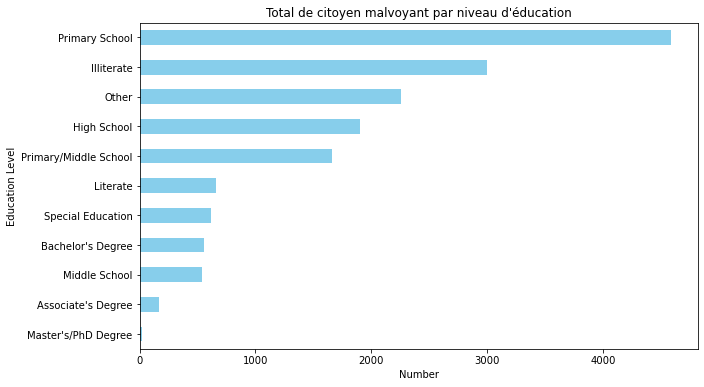

In [61]:
plt.figure(figsize=(10, 6))
total_education.sort_values().plot(kind='barh', color='skyblue')
plt.title('Total de citoyen malvoyant par niveau d\'éducation')
plt.xlabel('Number')
plt.ylabel('Education Level')
plt.show()

#### Les graphiques à barres ci-dessus affichent le nombre total de citoyens malvoyants regroupés par district, sexe et niveau d'éducation.

> District : Le graphique montre que les districts comptant le plus grand nombre de citoyens malvoyants sont Bahçelievler, Gaziosmanpaşa, Küçükçekmece, Esenyurt et Sultanbeyli.

> Sexe : Le graphique montre qu'il y a plus de citoyens malvoyants de sexe masculin que de femmes.

> Niveau d'éducation : le graphique montre que le niveau d'éducation le plus courant parmi les citoyens malvoyants est « école primaire », suivi de « illettré », « autre » et « lycée ».

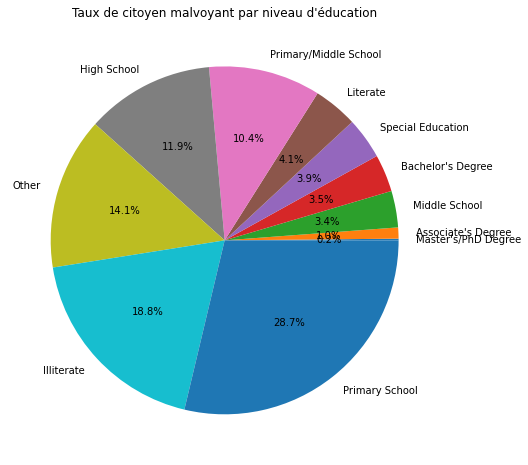

In [106]:
plt.figure(figsize=(10, 8))
pourcentage_education.sort_values().plot(kind='pie', autopct='%1.1f%%')
plt.title('Taux de citoyen malvoyant par niveau d\'éducation')
plt.ylabel('')  
plt.show()

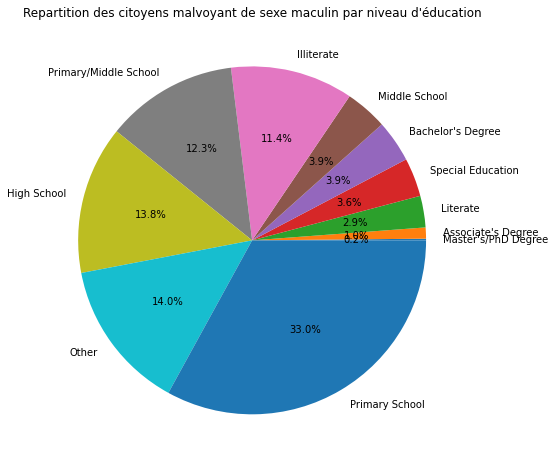

In [107]:
plt.figure(figsize=(10, 8))
pourcentage_male.sort_values().plot(kind='pie', autopct='%1.1f%%')
plt.title('Repartition des citoyens malvoyant de sexe maculin par niveau d\'éducation')
plt.ylabel('')  # Remove the default 'None' ylabel
plt.show()

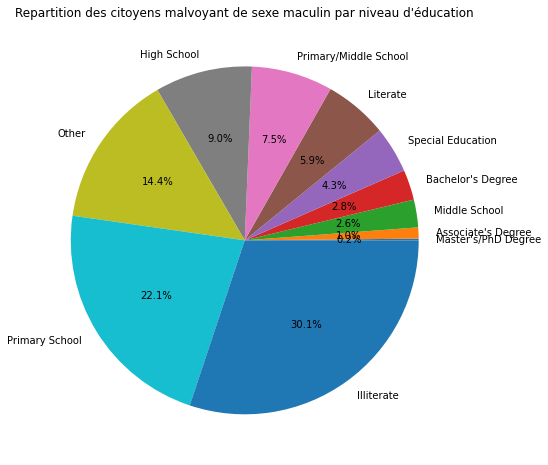

In [69]:
plt.figure(figsize=(10, 8))
pourcentage_female.sort_values().plot(kind='pie', autopct='%1.1f%%')
plt.title('Repartition des citoyens malvoyant de sexe maculin par niveau d\'éducation')
plt.ylabel('')  # Remove the default 'None' ylabel
plt.show()

#### Les diagrammes circulaires ci-dessus représentent la répartition des niveaux d'éducation parmi les citoyens malvoyants.

> Répartition globale des niveaux d'éducation : La majorité des citoyens malvoyants ont terminé l'école primaire (28,7 %), sont « analphabètes » (18,8 %) ou entrent dans la catégorie « Autres » (14,1 %).

> Répartition du niveau d'éducation parmi les citoyens masculins malvoyants : La majorité des citoyens masculins malvoyants ont terminé l'école primaire (35,7 %), entrent dans la catégorie « Autre » (15,2 %) ou ont terminé l'école secondaire (14,9 %). .

> Répartition du niveau d'éducation parmi les citoyennes malvoyantes : La majorité des citoyennes malvoyantes sont « analphabètes » (37,8 %), ont terminé l'« école primaire » (27,8 %) ou entrent dans la catégorie « Autre » (18,0 %).

<a id='conclusion'></a>
# Conclusion

> Ceci conclut notre analyse exploratoire des données de l’ensemble de données. Nous avons exploré les données sous différents angles, en nous concentrant sur le nombre et la répartition des citoyens malvoyants dans différents districts, sexes et niveaux d'éducation.

> Les visualisations fournissent une compréhension claire et intuitive de ces distributions.

### D'après les résultats d'analyse nous pouvons faire les remarques suivantes:

> Le sexe des individu semble avoir un impact significatif sur le niveau d'étude des personnes malvoyantes.

> Le district ou le lieu de residence également impacte sur le niveau d'étude de ceux-ci.
